<a href="https://colab.research.google.com/github/SamGrievo/ResNet50MultiClassClasffication/blob/main/Blood_Classification_no_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.losses import categorical_crossentropy
from keras.optimizers import adam_v2
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from skimage import io
from skimage.transform import resize
from sklearn.metrics import f1_score


In [ ]:
#prepare image file paths
data = ['drive/MyDrive/dataset2-master/images/TRAIN', 'drive/MyDrive/dataset2-master/images/TEST']
path = 'drive/MyDrive/dataset2-master/images/TRAIN/EOSINOPHIL/_29_9452.jpeg'

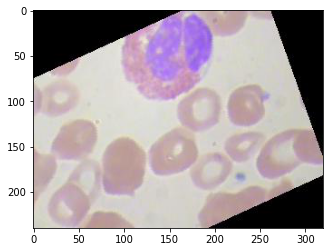

In [ ]:
#function to show example image
def read_and_show_image(path):

    test_image = io.imread(path)
    plt.imshow(test_image)
    plt.show()

read_and_show_image(path)

In [ ]:
#prepare arrays to images and image labels to be added
images = []
labels = []
count = 0

for dataset in data:
    # loop through the folders in the train set and test set
    for folder in os.listdir(dataset):

        #labels each string label with a key
        if folder in ['EOSINOPHIL']: label = 'EOSINOPHIL'
        elif folder in ['LYMPHOCYTE']: label = 'LYMPHOCYTE'
        elif folder in ['MONOCYTE']: label = 'MONOCYTE'
        elif folder in ['NEUTROPHIL']: label = 'NEUTROPHIL'

        # loop through the images in the datasets
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):

            # get pathname of each image to be read
            img_path = os.path.join(os.path.join(dataset, folder), file)

            image = cv2.imread(img_path)
            image = cv2.resize(image, (224,224))
            

            images.append(image)
            labels.append(label)



100%|██████████| 499/499 [00:02<00:00, 239.69it/s]


In [ ]:
def split_array(image_list, label_list,split):
    new_images = []
    new_labels = []
    for i in range(len(labels)):
        if i % split == 0:
            new_images.append(image_list[i])
            new_labels.append(label_list[i])
        else:
            continue

    return new_images, new_labels

In [ ]:
split_images, split_labels = split_array(images,labels,3)

In [ ]:
images_array = np.array(split_images, dtype = 'float32')

In [ ]:
labels_array = np.array(split_labels)

In [ ]:
print(len(labels_array))

2696


In [ ]:
from tensorflow.keras.utils import to_categorical
#train test split to split the images and labels into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(images_array, labels_array, shuffle=True, random_state=42, test_size=0.25)

x_train /= 255
x_test /= 255

In [ ]:
#this will one hot encode the values so that each class is interpretable to the ResNet
def prepare_targets(y, y_t):
    le = LabelEncoder()
    le.fit(y)
    y_train_encode = le.transform(y)
    y_test_encode = le.transform(y_t)
    return y_train_encode, y_test_encode

y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

# convert class vectors to binary class matrices
y_train = to_categorical(y_train_enc, 4)
y_test = to_categorical(y_test_enc, 4)
#display first training image and training label
print('Training set shapes:', x_train.shape, y_train.shape)

print('Label for first image in training set:', y_test)


Training set shapes: (2022, 224, 224, 3) (2022, 4)
Label for first image in training set: [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
print(y_train)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [ ]:
# #prepare model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(240, 240, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2))) 
# model.add(Dropout(0.3))
# model.add(Flatten()) # This line is to convert from matrices to vectors
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))
# model.add(Dense(4, activation='softmax')) # we are working with vectors now, so we use a Dense layer instead of Conv2d
# model.summary()

In [ ]:
model = ResNet50(classes=4, weights=None)

In [ ]:

#compile model, set metrics to evaluate training model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'Recall', 'Precision'])

In [ ]:
model.fit(x_train,y_train, epochs=100, validation_split=0.1)

Epoch 1/100
57/57 [==============================] - 31s 382ms/step - loss: 1.7942 - accuracy: 0.3793 - recall: 0.3095 - precision: 0.4089 - val_loss: 2.1563 - val_accuracy: 0.2709 - val_recall: 0.2512 - val_precision: 0.2881
Epoch 2/100
57/57 [==============================] - 19s 331ms/step - loss: 0.9651 - accuracy: 0.6053 - recall: 0.5195 - precision: 0.6646 - val_loss: 1.8906 - val_accuracy: 0.2709 - val_recall: 0.2709 - val_precision: 0.2709
Epoch 3/100
57/57 [==============================] - 19s 334ms/step - loss: 0.7858 - accuracy: 0.6905 - recall: 0.6372 - precision: 0.7168 - val_loss: 3.0298 - val_accuracy: 0.2709 - val_recall: 0.2709 - val_precision: 0.2709
Epoch 4/100
57/57 [==============================] - 19s 332ms/step - loss: 0.7069 - accuracy: 0.7345 - recall: 0.6976 - precision: 0.7635 - val_loss: 5.8269 - val_accuracy: 0.2709 - val_recall: 0.2709 - val_precision: 0.2709
Epoch 5/100
57/57 [==============================] - 19s 329ms/step - loss: 0.4856 - accuracy: 0

In [ ]:
#evaluate model
evaluation = model.evaluate(x_test,y_test)

22/22 [==============================] - 2s 112ms/step - loss: 0.0804 - accuracy: 0.9748 - recall: 0.9748 - precision: 0.9748


In [ ]:
predict = model.predict(x_test)

In [ ]:
print(evaluation[2])

0.9747774600982666


In [ ]:
F1 = 2 * (evaluation[3] * evaluation[2]) / (evaluation[3] + evaluation[2])

In [ ]:
print('The average F1 score for all classes is:', F1)

The average F1 score for all classes is: 0.9747774600982666
